### Implementation of multiple linear Regression on economic dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
from sklearn import linear_model
import seaborn as sns
%matplotlib inline


In [8]:
df= pd.read_csv('economic_index.csv')

In [9]:
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [10]:
df.describe()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [15]:
df.head(6)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254


In [16]:
df.tail()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
19,19,2016,5,1.75,6.1,866
20,20,2016,4,1.75,5.9,876
21,21,2016,3,1.75,6.2,822
22,22,2016,2,1.75,6.2,704
23,23,2016,1,1.75,6.1,719


In [ ]:
df.shape 

(24, 6)

In [20]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [30]:
sns.pairplot(df)


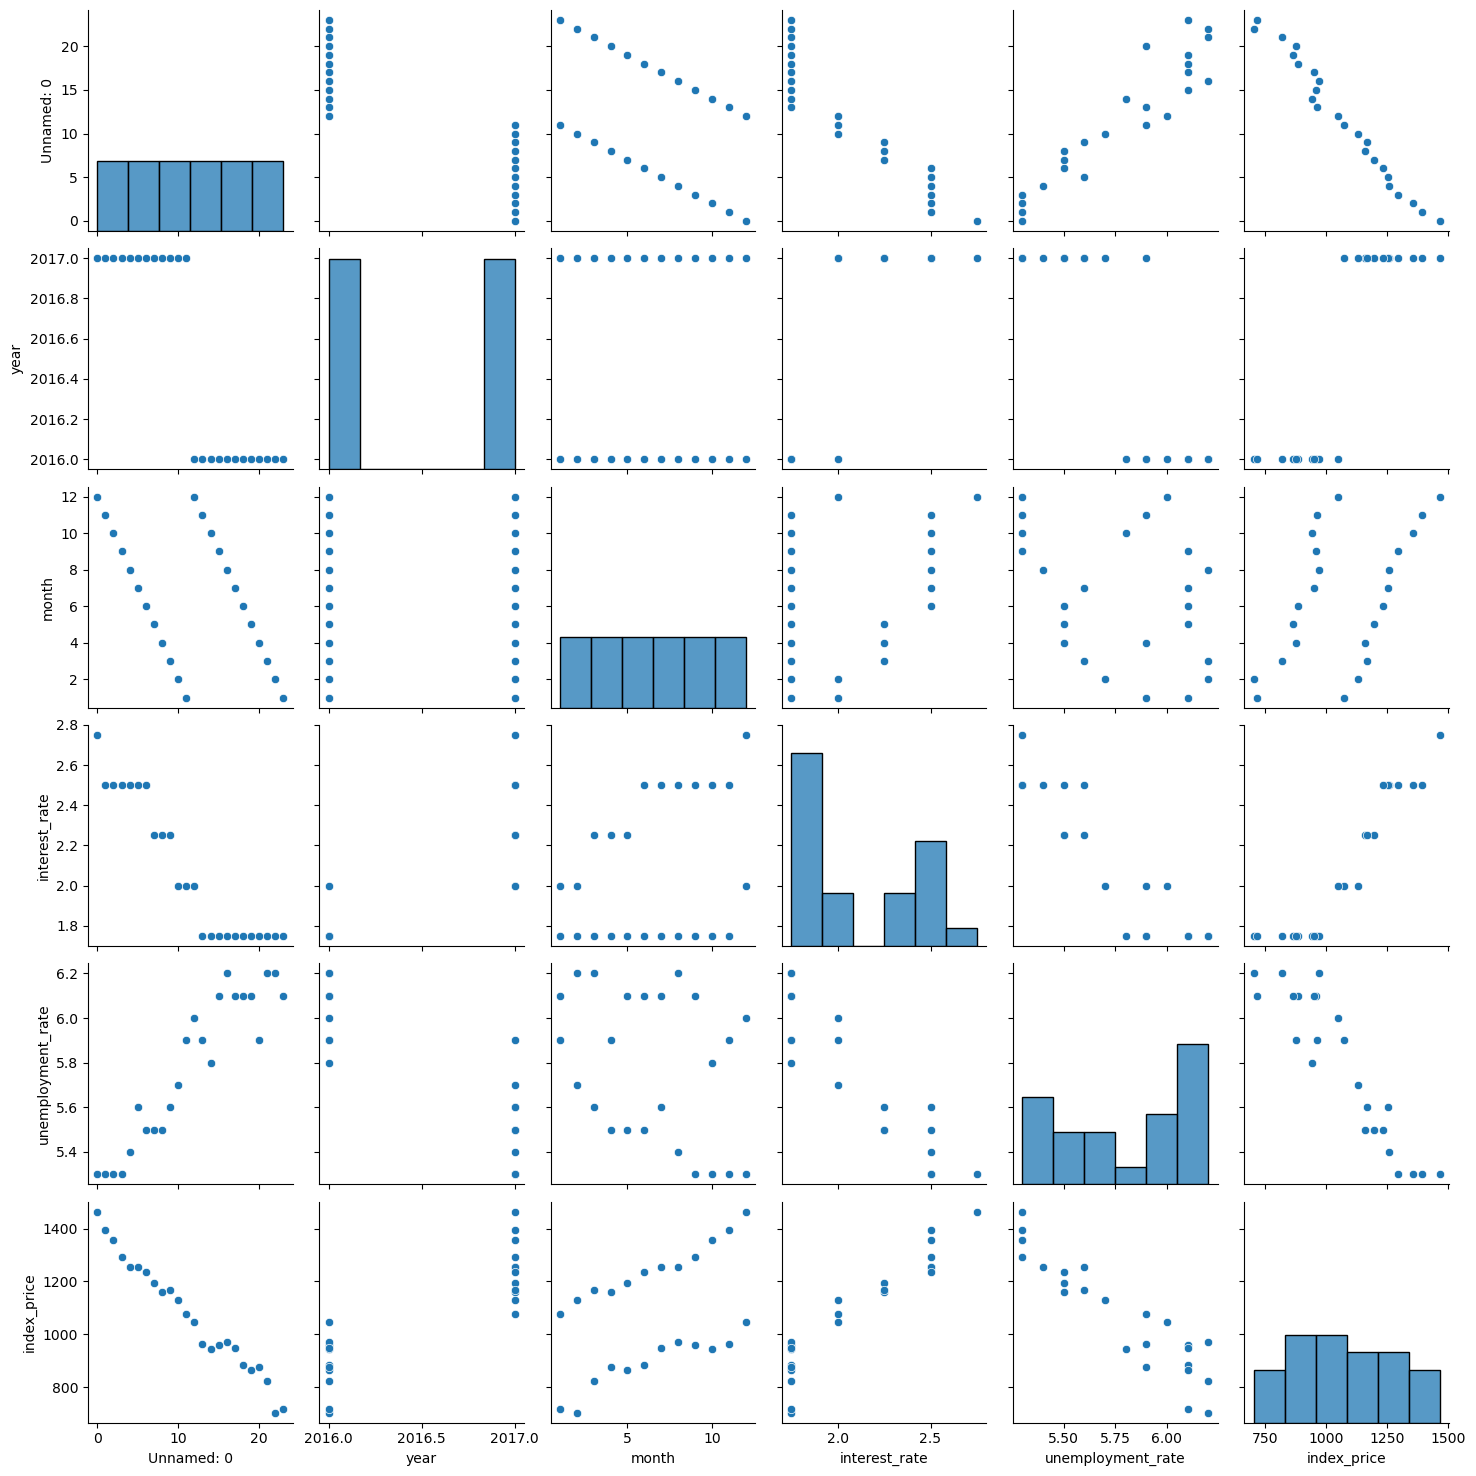

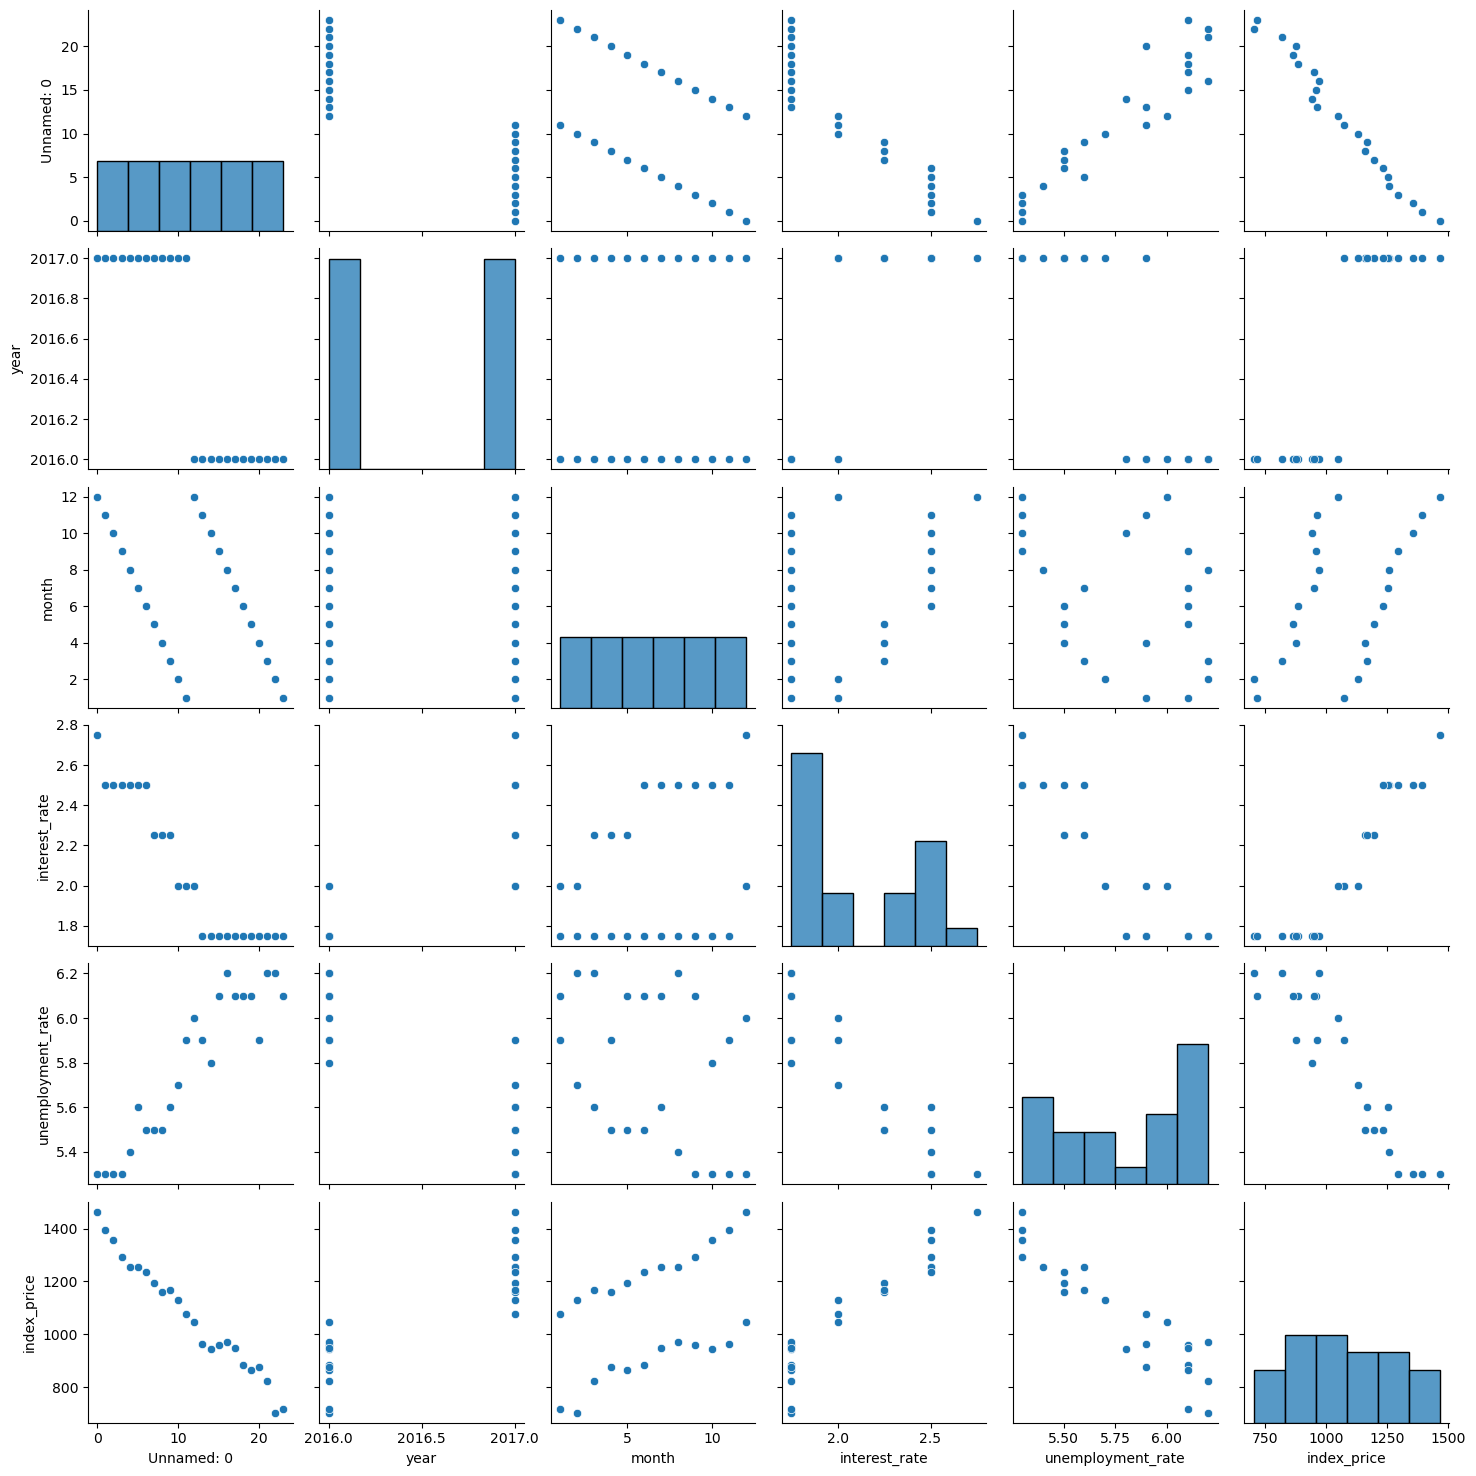

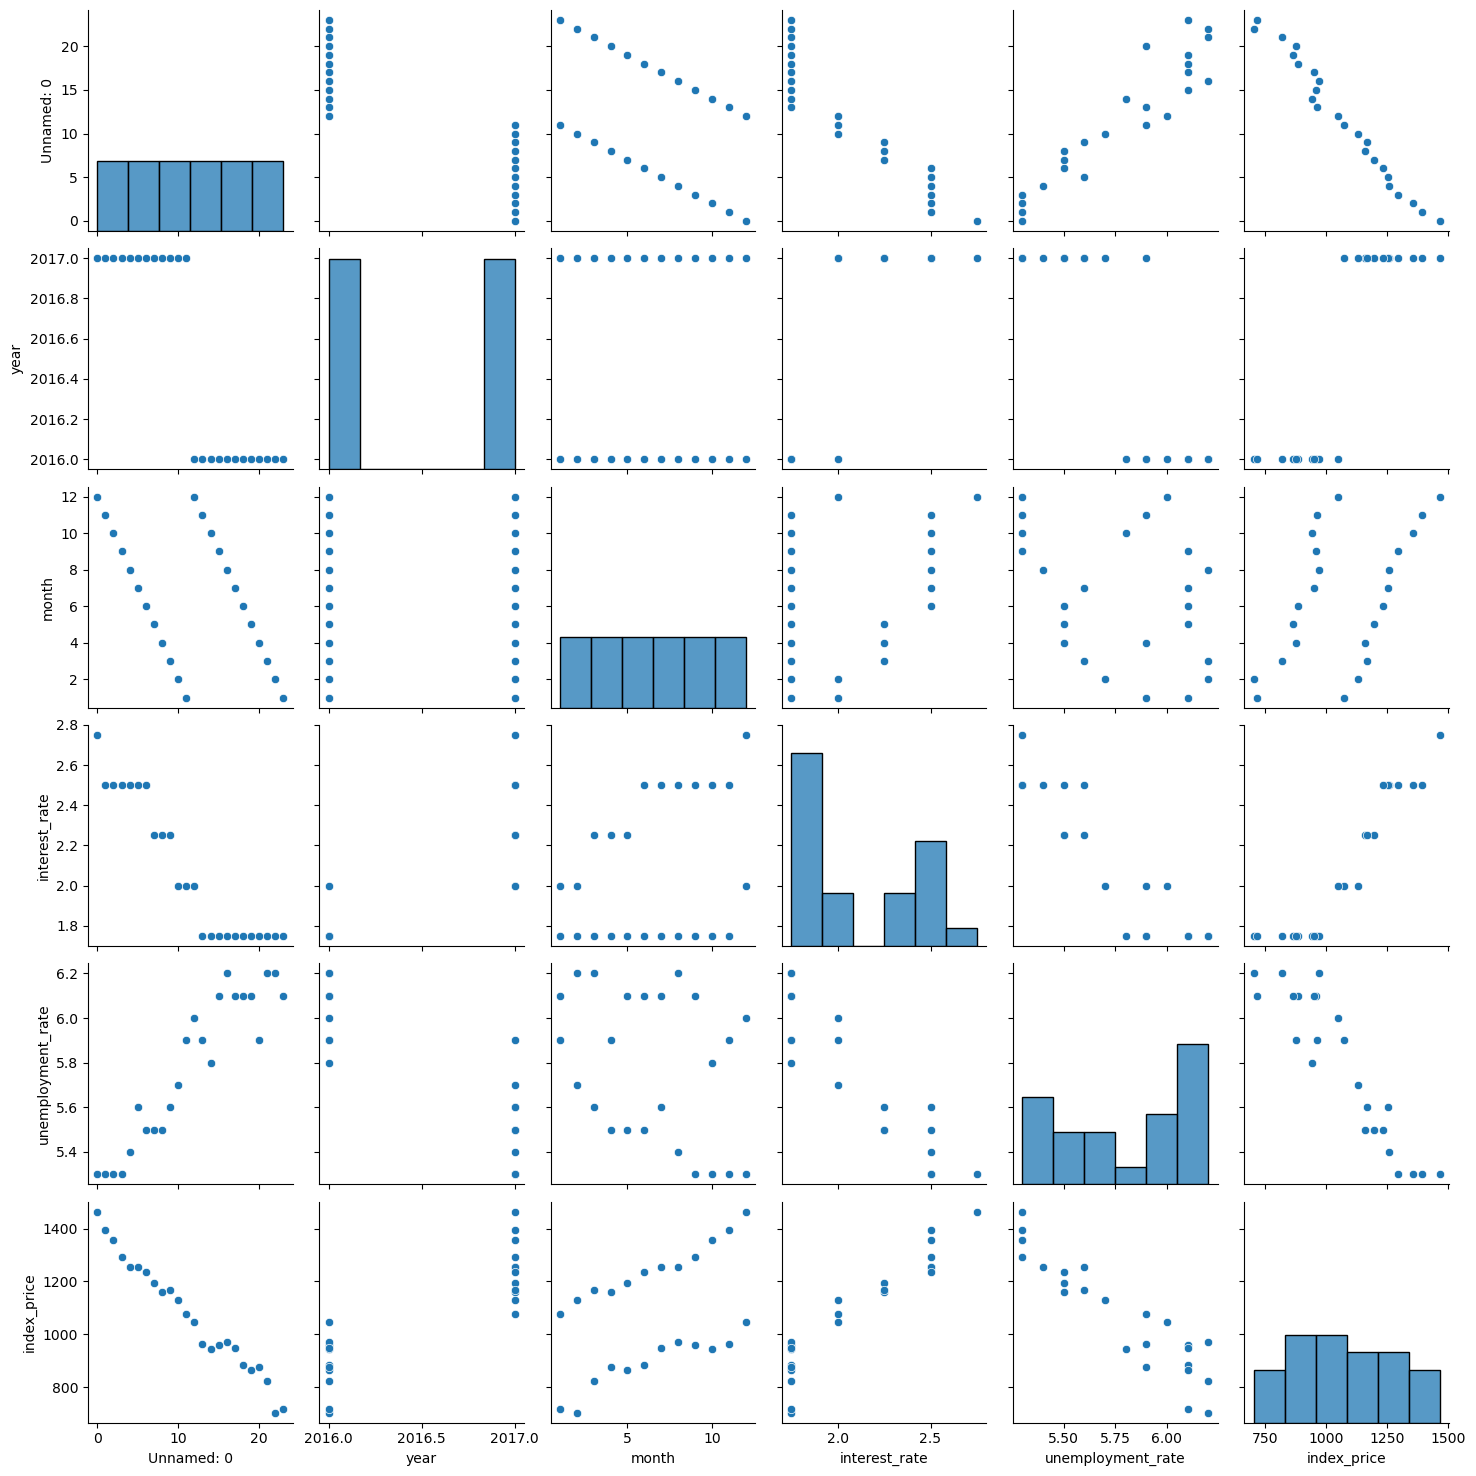

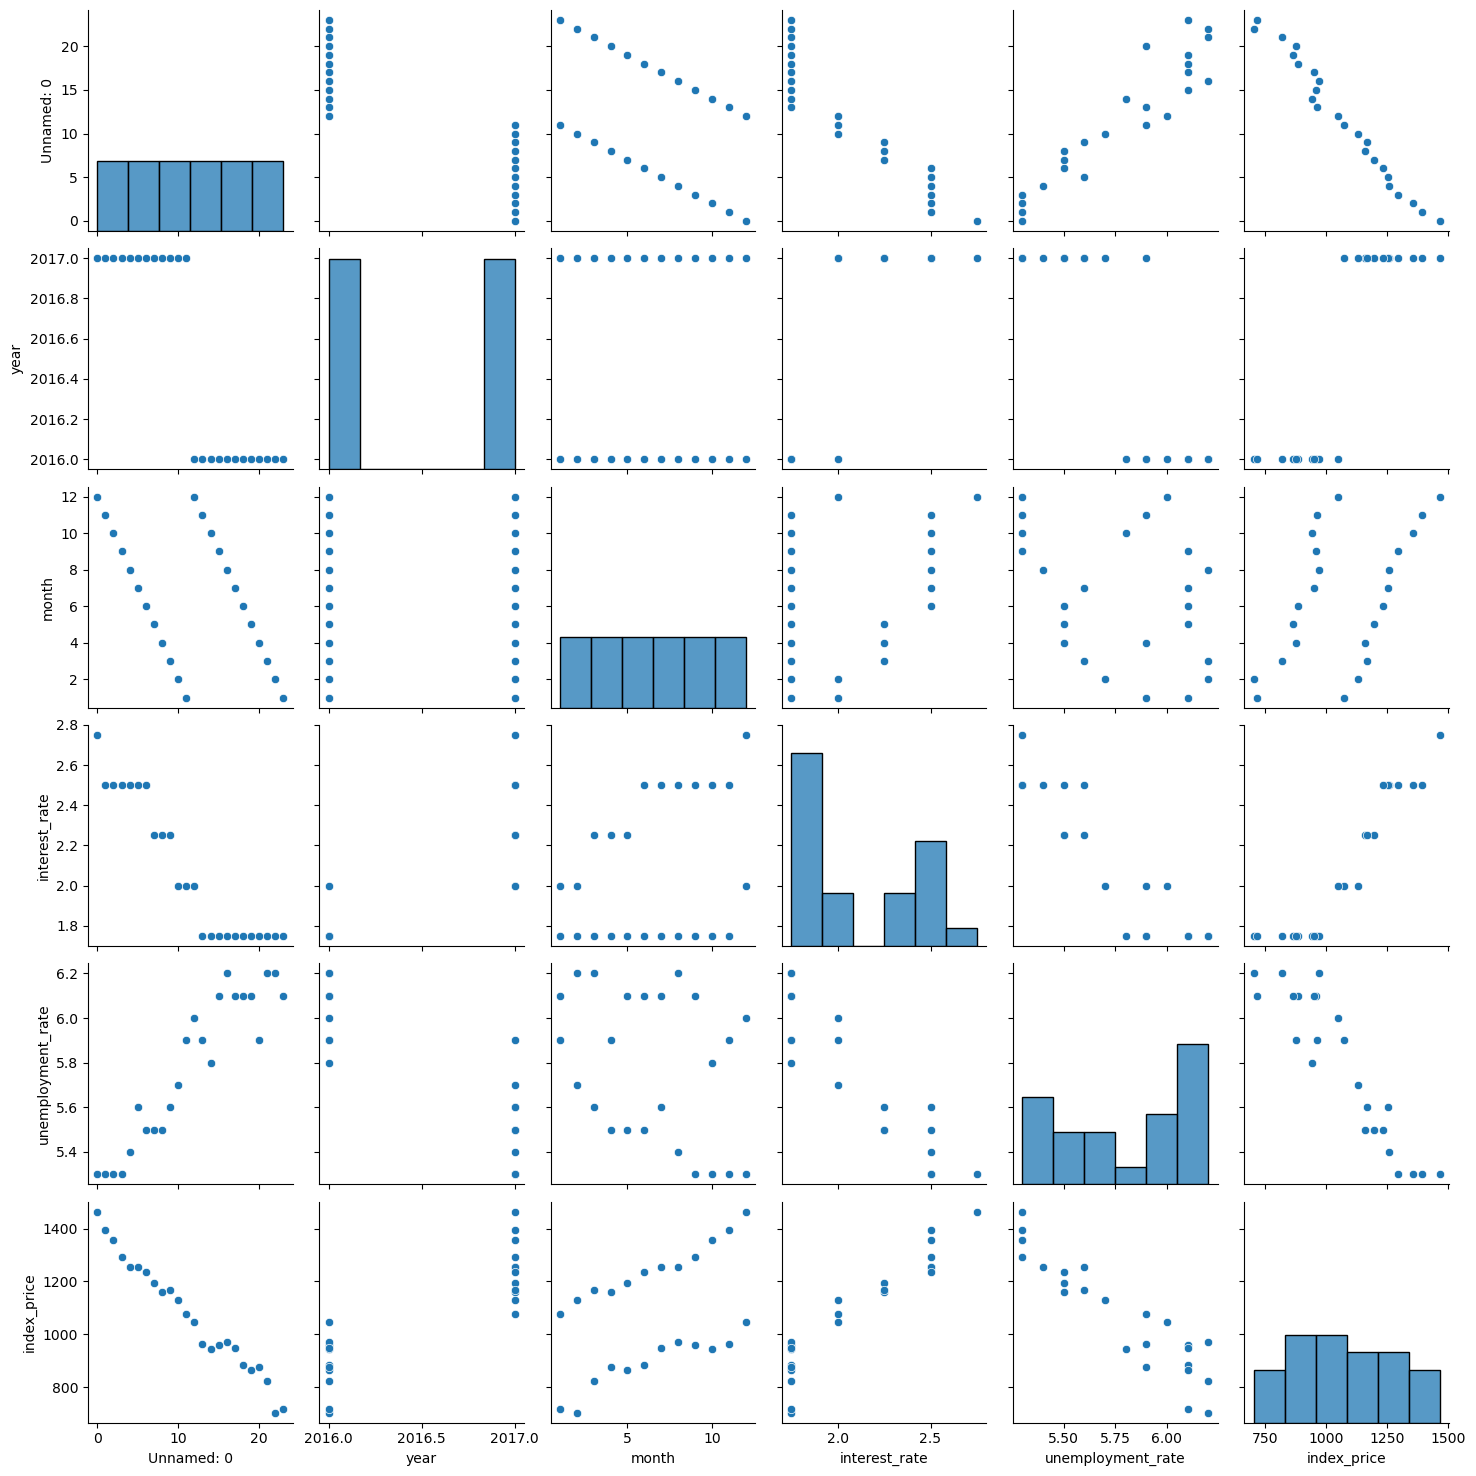

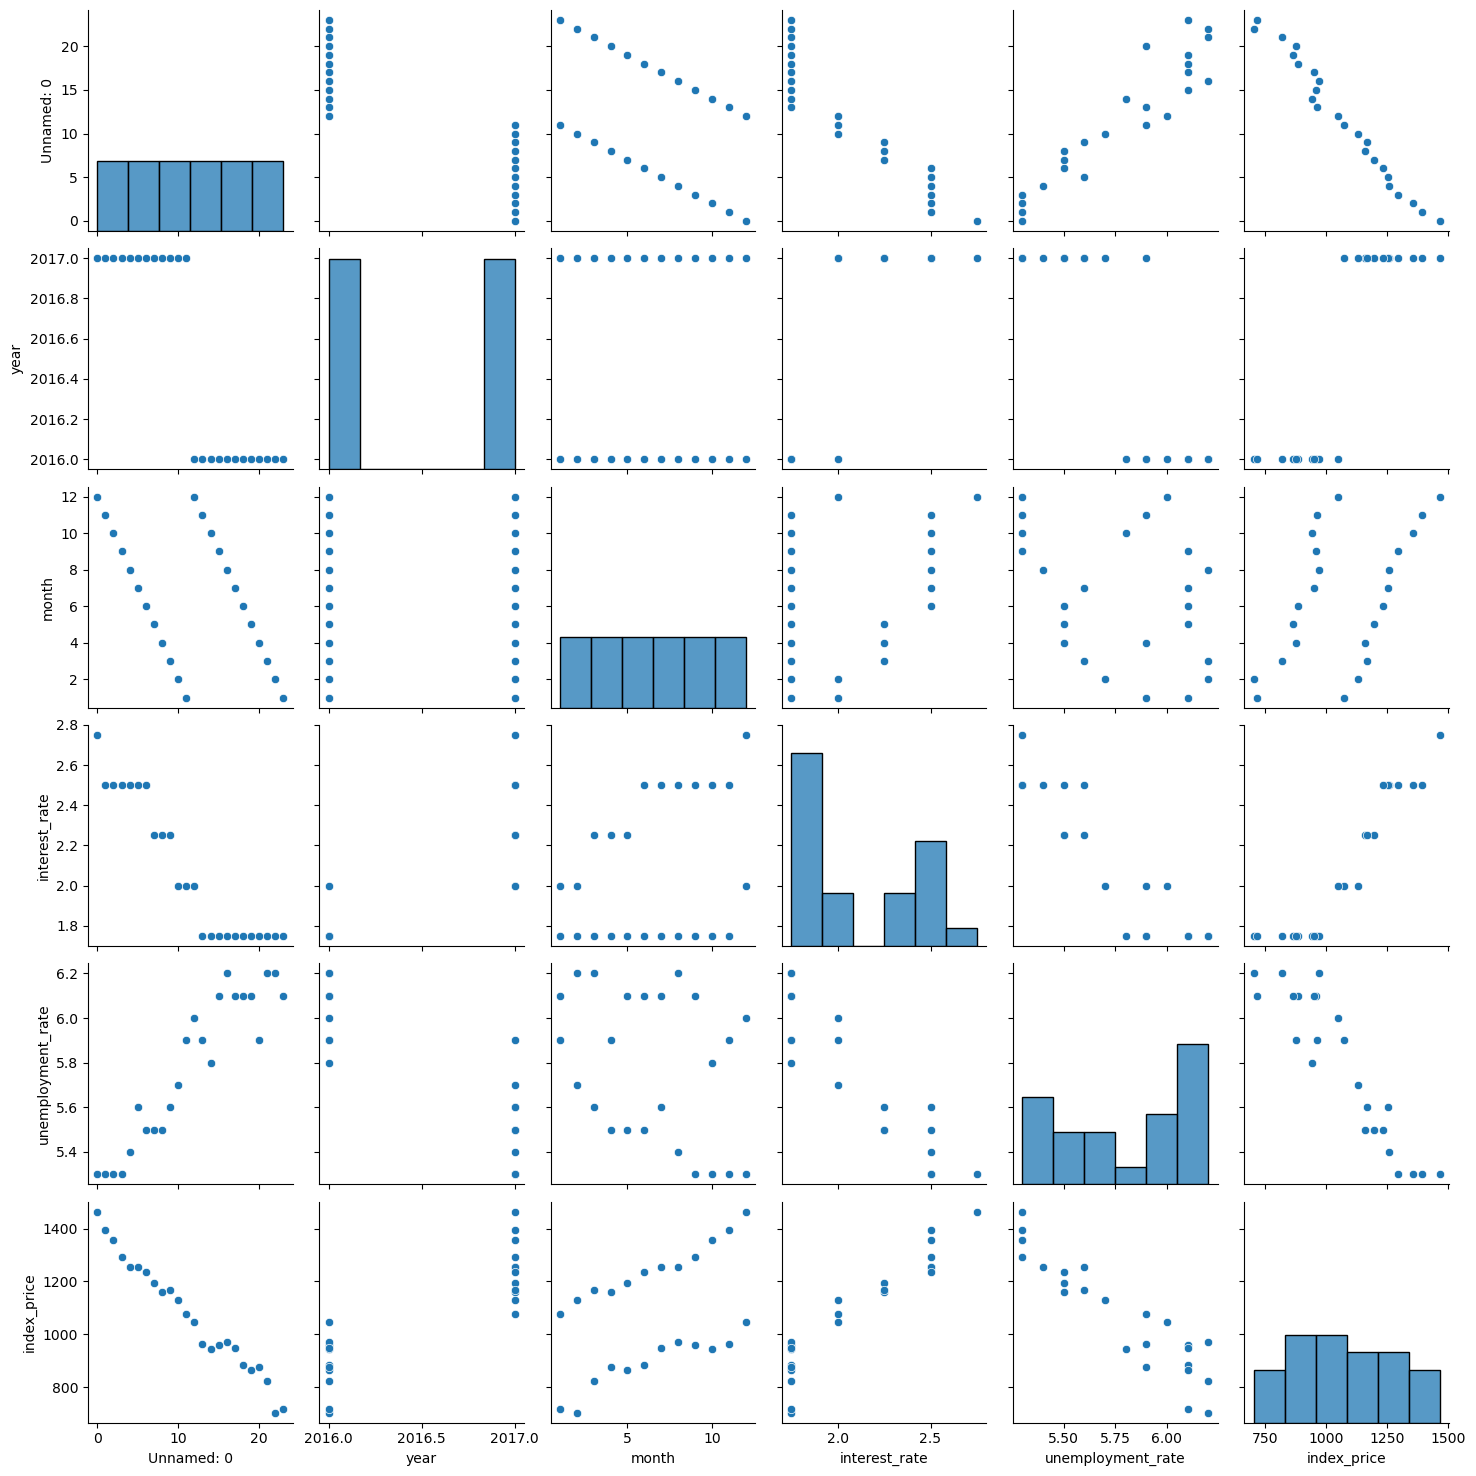

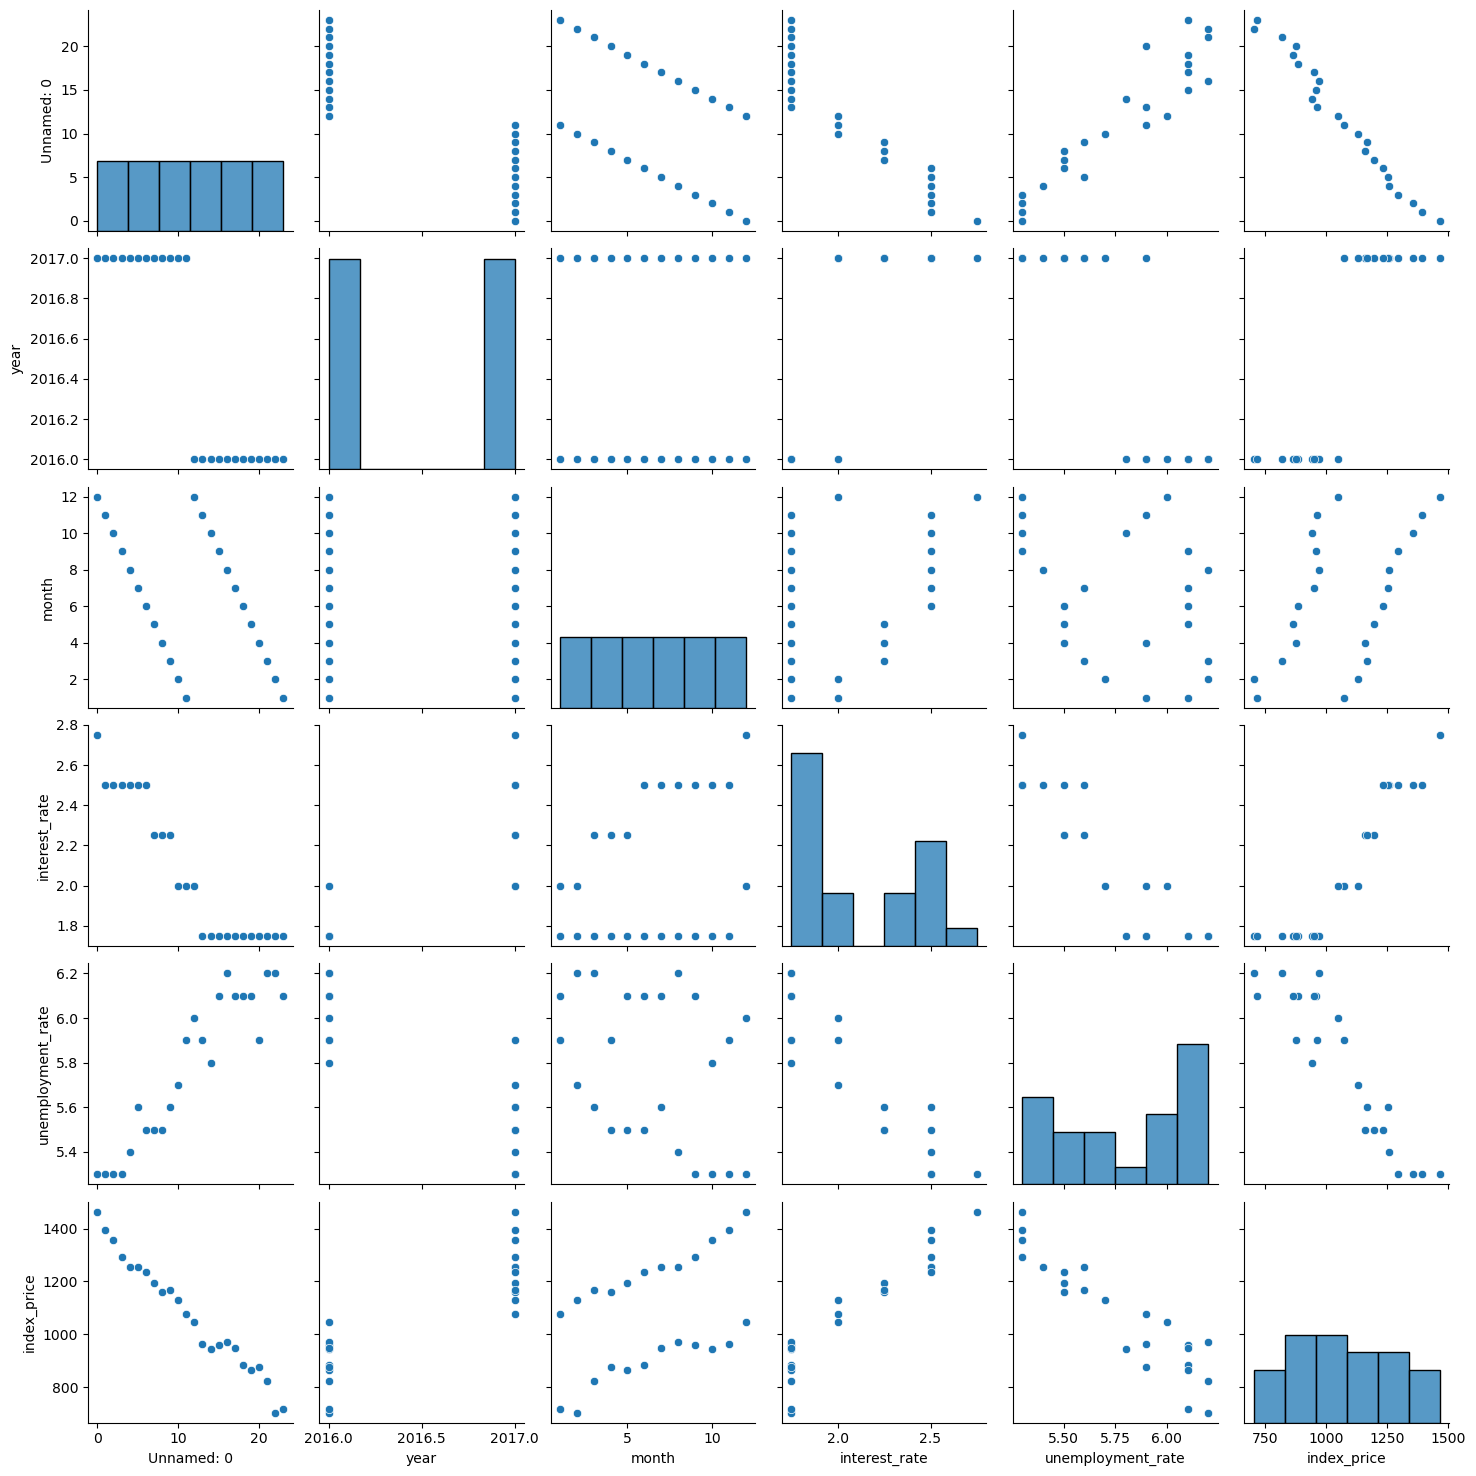

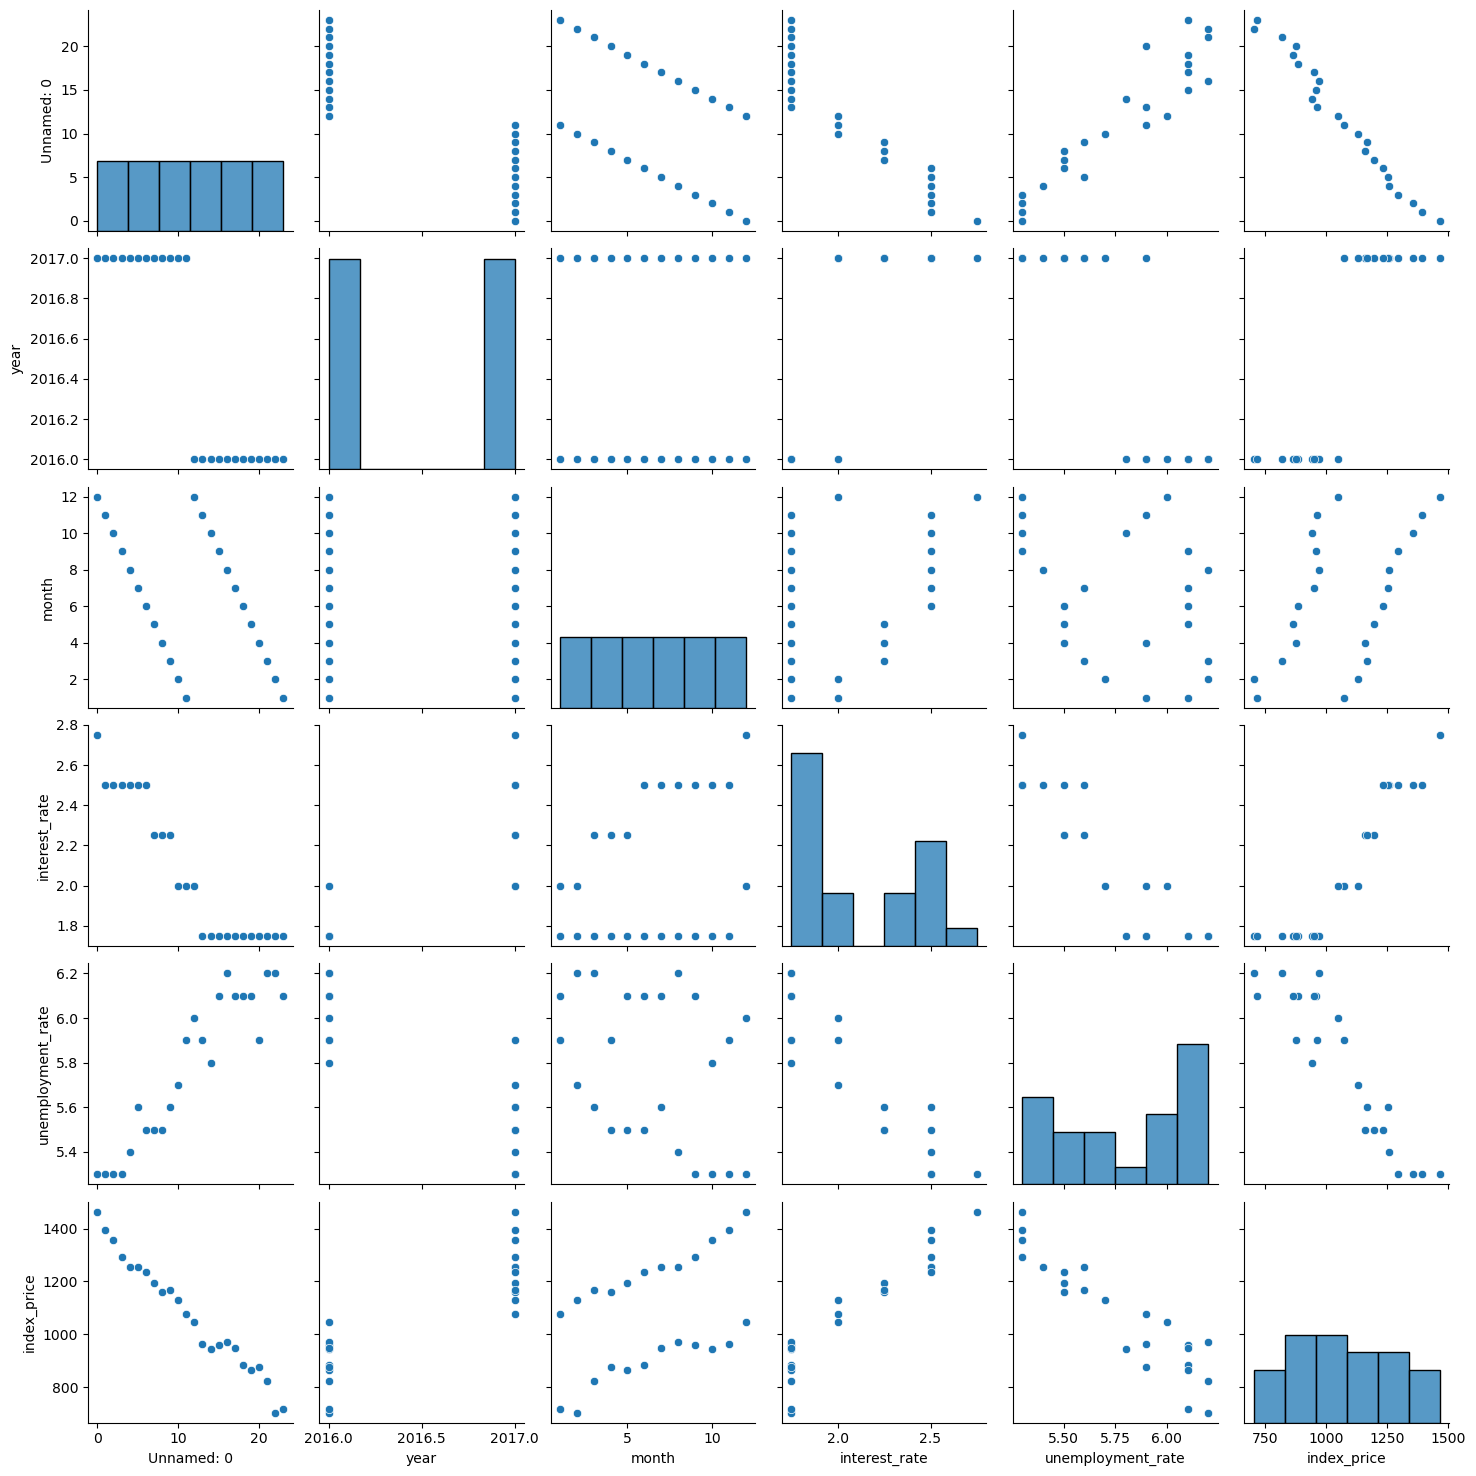

In [32]:
py.show()

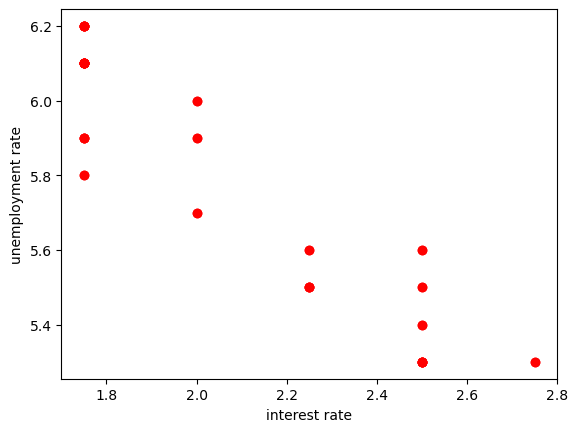

In [35]:
py.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
py.xlabel('interest rate')
py.ylabel('unemployment rate')
py.show()


In [ ]:
df.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [37]:
 #iloc refers to location
X= df.iloc[:,:-1] #here -1 represents all except last column
Y=df.iloc[:,-1] 

In [45]:
X.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate
0,0,2017,12,2.75,5.3
1,1,2017,11,2.50,5.3
2,2,2017,10,2.50,5.3
3,3,2017,9,2.50,5.3
4,4,2017,8,2.50,5.4


In [46]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [51]:
#df.drop('Unnamed: 0',axis='columns')
df

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [58]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

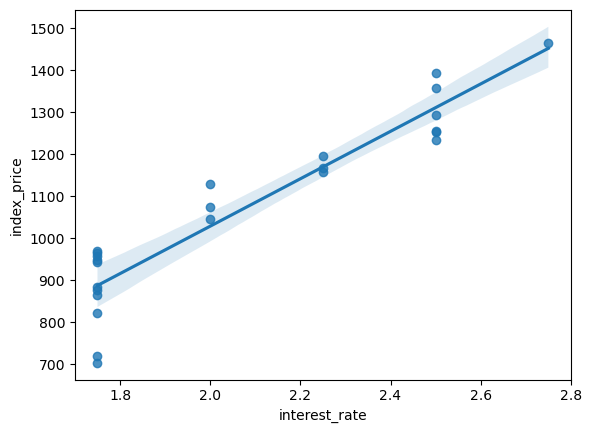

In [60]:
py.show()

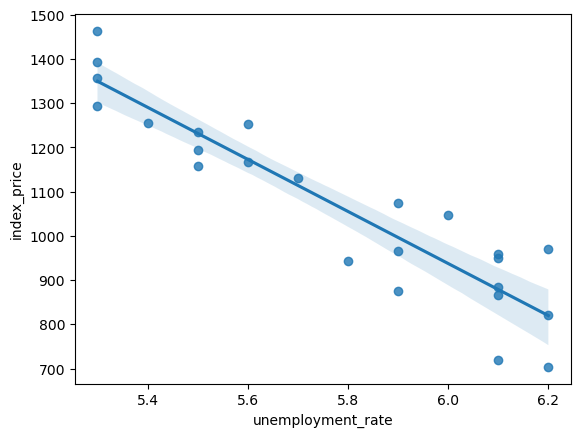

In [61]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])
py.show()

In [63]:
from sklearn.preprocessing import StandardScaler #changing the uniformity of attributes
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [64]:
X_train


array([[ 0.15426662, -0.89442719,  1.25692828, -0.90115511,  0.37908503],
       [-1.51181292,  1.11803399,  1.25692828,  1.31077107, -1.48187786],
       [ 1.26498632, -0.89442719, -1.12462004, -0.90115511,  1.30956648],
       [-0.95645307,  1.11803399,  0.06615412,  1.31077107, -0.55139641],
       [-1.37297296,  1.11803399,  0.95923474,  1.31077107, -1.48187786],
       [ 0.01542666, -0.89442719,  1.55462182, -0.16384638,  0.68924552],
       [ 0.43194655, -0.89442719,  0.6615412 , -0.90115511,  0.999406  ],
       [-1.23413299,  1.11803399,  0.6615412 ,  1.31077107, -1.48187786],
       [-1.09529303,  1.11803399,  0.36384766,  1.31077107, -1.17171738],
       [ 1.40382628, -0.89442719, -1.42231358, -0.90115511,  1.30956648],
       [ 0.70962647, -0.89442719,  0.06615412, -0.90115511,  0.999406  ],
       [ 1.12614636, -0.89442719, -0.8269265 , -0.90115511,  0.37908503],
       [ 1.54266624, -0.89442719, -1.72000712, -0.90115511,  0.999406  ],
       [-0.67877315,  1.11803399, -0.5

In [65]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [66]:
regression.fit(X_train,Y_train)

LinearRegression()

In [68]:
#cross validation(picks up different combinations
#hyper parameter tuning

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [69]:
np.mean(validation_score)

-1556.413287290552

In [70]:
Y_pred=regression.predict(X_test)

In [71]:
Y_pred

array([1137.77287695,  852.80136784, 1374.71877553,  792.98757646,
       1052.52761415, 1109.85845574])

In [73]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5741.011647598836
66.55555555555566
75.76946382018838
